In [1]:
from Bio import SeqIO
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# Pull  from the americas
sequence_dict = { s.description.split('|')[0]: s for s in SeqIO.parse(open('./data/dengue.fasta', 'r'), 'fasta') if 'america' in s.description }

In [13]:
# Parse to dictionary records -> dataframe
sequences = []
for s in sequence_dict.keys():
    serotype, country, strain, year = s.split('/')
    sequences.append(
    {'country': country,
    'year': year, 
     'serotype': serotype, 
     'strain': strain}
    )
sequences = pd.DataFrame(sequences)
print pd.value_counts(sequences.country)

NICARAGUA              454
PUERTO_RICO            381
VENEZUELA              280
BRAZIL                 278
MEXICO                 158
PERU                    76
CUBA                    33
COLOMBIA                27
ARGENTINA               27
USA                     22
FRENCH_GUIANA           17
DOMINICAN_REPUBLIC       7
MARTINIQUE               7
HAITI                    7
PARAGUAY                 7
AMERICAN_SAMOA           5
JAMAICA                  3
SURINAME                 2
TRINIDAD_AND_TOBAGO      2
GUATEMALA                2
DOMINICA                 2
SAINT_LUCIA              2
GUYANA                   2
GUADELOUPE               2
HONDURAS                 1
SAINT_KITTS              1
EL_SALVADOR              1
ECUADOR                  1
ANTIGUA_AND_BARBUDA      1
ANGUILLA                 1
GRENADA                  1
NAURU                    1
CHILE                    1
BARBADOS                 1
BOLIVIA                  1
BELIZE                   1
Name: country, dtype: int64


In [14]:
# Restrict to neighboring countries with lots of sequence data
sequences = sequences[sequences['country'].isin(['VENEZUELA', 'BRAZIL', 'PERU', 'COLOMBIA'])]
print pd.value_counts(sequences.country)

VENEZUELA    280
BRAZIL       278
PERU          76
COLOMBIA      27
Name: country, dtype: int64


In [15]:
# Count the number for each serotype, per country per year.
sequences.year = pd.to_numeric(sequences.year, errors='coerce')
df = sequences.groupby(['country', 'year', 'serotype'], as_index=False).count().reset_index()
df.rename(columns={'strain': 'count'}, inplace=True)
df.head()

,index,country,year,serotype,count
0,0,BRAZIL,1982.0,DENV4,1
1,1,BRAZIL,1988.0,DENV1,1
2,2,BRAZIL,1989.0,DENV1,1
3,3,BRAZIL,1990.0,DENV1,2
4,4,BRAZIL,1990.0,DENV2,2


(1980, 2017)

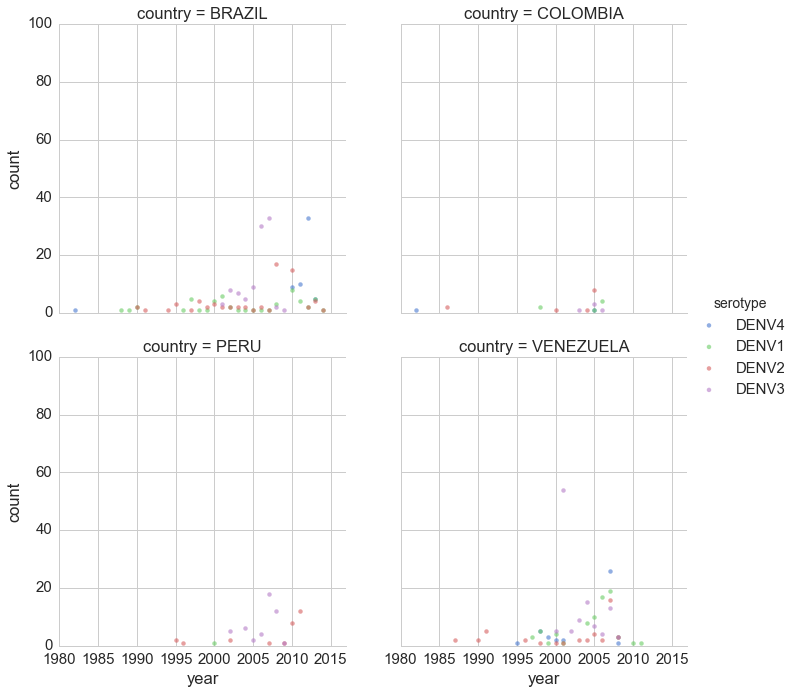

In [16]:
# Plot this with seaborn
sns.set(style='whitegrid', font_scale=1.5, palette='muted')
plot = sns.lmplot(x='year', y='count', hue='serotype', col='country', data=df,col_wrap=2,fit_reg=False, scatter_kws={'alpha': 0.6})
plt.ylim(0, 100)
plt.xlim(1980, 2017)

In [20]:
# Which places do we have the most sequences for since 2000?
counts = pd.value_counts(sequences[sequences.year >= 2000].country)
print counts
print counts.sum()

BRAZIL       249
VENEZUELA    241
PERU          73
COLOMBIA      21
Name: country, dtype: int64
584


In [24]:
microcosm = []
for ID, record in sequence_dict.items():
    sero, country, strain, year = ID.split('/')
    try:
        if int(year) >= 2000 and country in counts.index.values:
            microcosm.append(record)
    except:
        continue

assert len(microcosm) == counts.sum()
SeqIO.write(microcosm, 'sa2k.fasta', 'fasta')

584